# Setup

In [217]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters

In [218]:
bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]
bounds_plt = [65,100,0,30]

# Get Data

In [219]:
ds_WOA = xr.open_dataset('../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, coastal_pos: 439, depth: 57, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                        (depth) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * coastal_pos                  (coastal_pos) int64 0 1 2 3 ... 435 436 437 438
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, depth, lat, lon) float64 ...
    psal                         (month, depth, lat, lon) float64 ...
    doxy                         (month, depth, lat, lon) float64 ...
    nitrate                      (month, depth, lat

In [220]:
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12, time: 329)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...

In [221]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 744, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-06-01 1958-07-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

# SLA IOD Years

In [222]:
IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

var = ds_SLA.mon_sla_mon_anom
# ------------------------------------------------------------#
# Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
posIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,posIODyears, roll = False)

# average over the negative IOD years -------------------------------------------# 
negIOD_mon_sla_mon_anom = IOD_year_group_grid(var,IODyear_begin,IODyear_end,negIODyears, roll = False)


/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Hypoxia Risk

In [225]:
var = ds_WOA.doxy_50_200

#______________________________________________________
# month of lowest oxygen, value of lowest oxygen in shelf waters
#______________________________________________________
mons = np.arange(1,13)

min_mean = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
min_mean_mon = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
min_mean_mon_SLA = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)

inc_risk_p = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],False)
inc_risk_n = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],False)
dec_risk_p = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],False)
dec_risk_n = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],False)
inc_risk_np = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],False)
hyp_thresh = 60.9
sev_hyp_thresh = 21.75
subox_thres = 4.35

# Find the no of times out of the year doxy falls into a given range
zero_to_hyp_per = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
fifty_to_hyp_per = np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
hyp_to_80_per= np.full([12,len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
    
for mm,ii,jj in itertools.product(np.arange(12),np.arange(len(ds_WOA.lat)),np.arange(len(ds_WOA.lon))):
    doxy = ds_WOA.doxy_50_200[mm,ii,jj]
    posIODsla = posIOD_mon_sla_mon_anom[mm,ii,jj]
    negIODsla = negIOD_mon_sla_mon_anom[mm,ii,jj]
    
    if (doxy < hyp_thresh) & (doxy > 50):
        zero_to_hyp_per[mm,ii,jj]  = 1
        if posIODsla > 0.02:
            dec_risk_p[mm,ii,jj] = True
        if negIODsla > 0.02:
            dec_risk_n[mm,ii,jj] = True
            
    if doxy < hyp_thresh:
        fifty_to_hyp_per[mm,ii,jj]  = 1
    if (doxy > hyp_thresh) & (doxy < 70):
        hyp_to_80_per[mm,ii,jj] = 1
        
        if posIODsla < -0.02:
            inc_risk_p[mm,ii,jj] = True
        if negIODsla < -0.02:
            inc_risk_n[mm,ii,jj] = True

zero_to_hyp_per = np.nansum(zero_to_hyp_per,0)/12*100
fifty_to_hyp_per = np.nansum(fifty_to_hyp_per,0)/12*100
hyp_to_80_per = np.nansum(hyp_to_80_per,0)/12*100

inc_risk_p = np.nansum(inc_risk_p,0)
inc_risk_n = np.nansum(inc_risk_n,0)
dec_risk_p = np.nansum(dec_risk_p,0)
dec_risk_n = np.nansum(dec_risk_n,0)

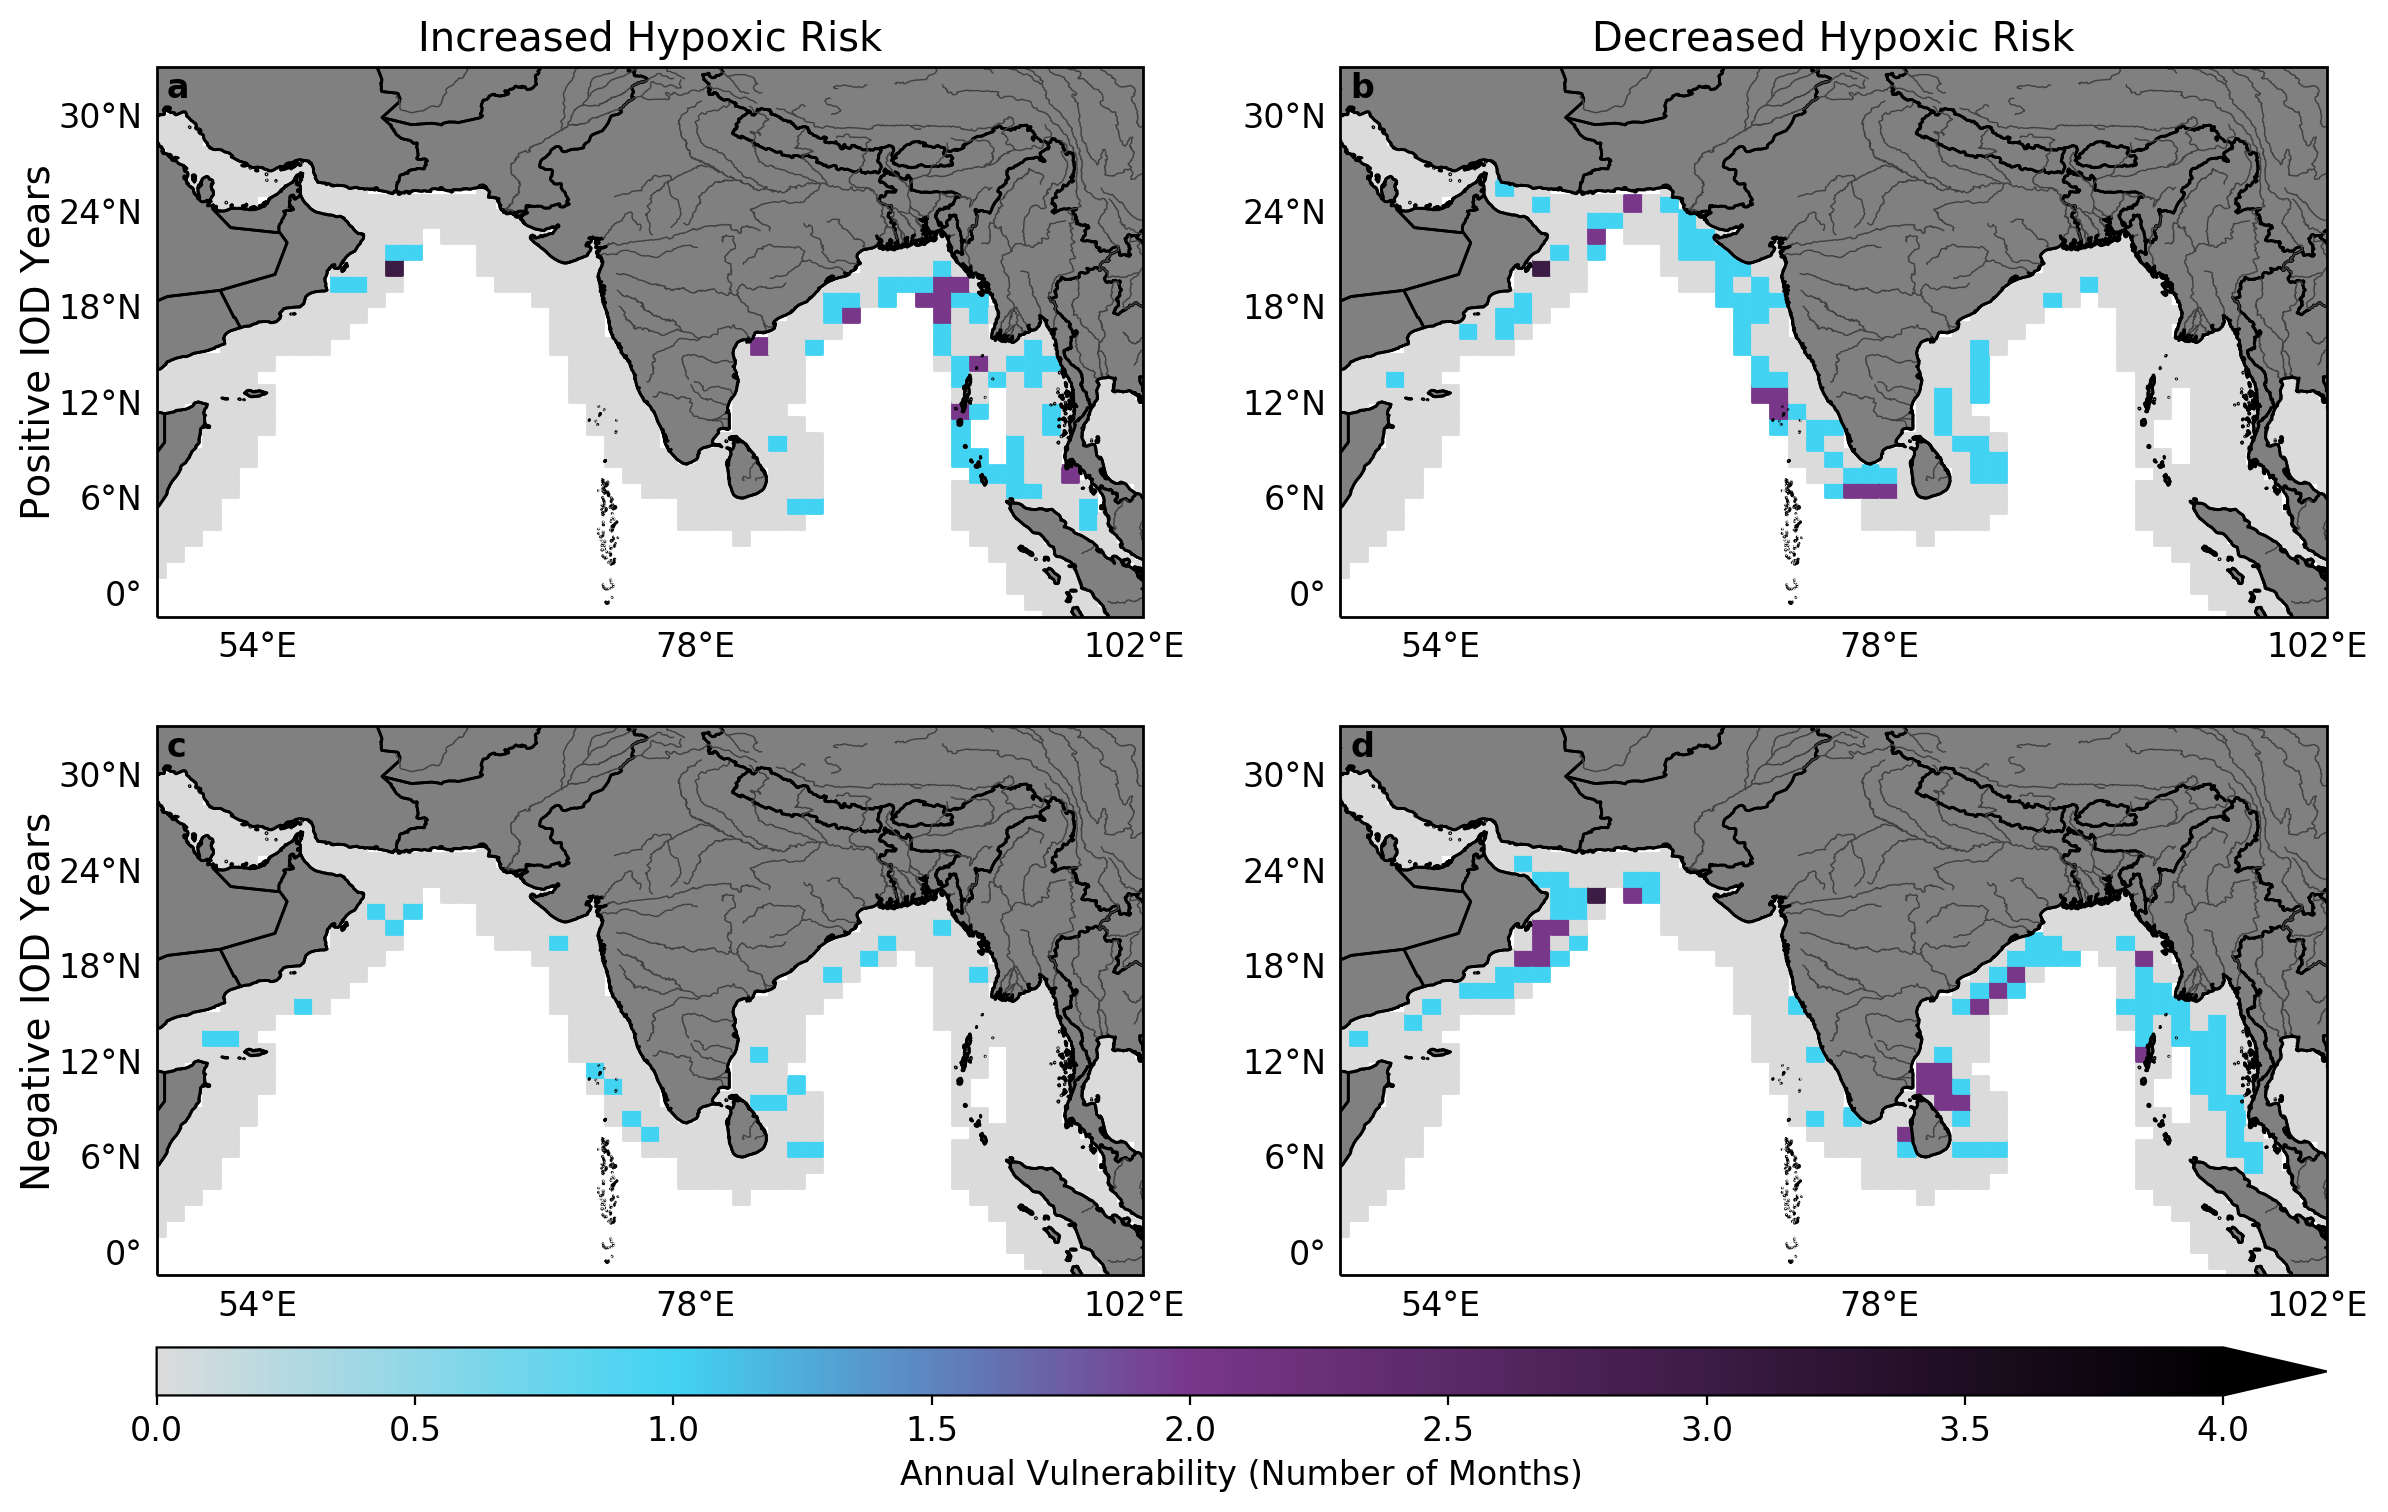

In [228]:
fig = plt.figure(figsize=(14,8),dpi=200)

sz = 35
fsz = 8

cmin = 0 
cmax = 4

# cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
#                            [0,0.25,0.5,1])
cmap = get_continuous_cmap(['#DcDcDc','#42d4f4','#7A378B','#000000'],
                           [0,0.25,0.5,1])
cbounds = [48.5,102.5,-1.5,33]


plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Hypoxia Duration','Increased Hypoxic Risk', 'Decreased Hypoxic Risk']
ylabel = ['Positive IOD Years', 'Negative IOD Years']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
# mon_title = ['jun','july','aug','sep','oct','nov','dec','jan','feb','mar','apr','may']



xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

zero_to_hyp_per_tmp = zero_to_hyp_per.flatten()[mask]
fifty_to_hyp_per_tmp = fifty_to_hyp_per.flatten()[mask]
hyp_to_80_per_tmp = hyp_to_80_per.flatten()[mask]

inc_risk_p_tmp = inc_risk_p.flatten()[mask]
inc_risk_n_tmp = inc_risk_n.flatten()[mask]
dec_risk_p_tmp = dec_risk_p.flatten()[mask]
dec_risk_n_tmp = dec_risk_n.flatten()[mask]
##############################################################
ax = fig.add_subplot(221,projection= ccrs.PlateCarree())

ax.scatter(xx,yy,c = inc_risk_p_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[1])
ax.text(-0.1, 0.5, 'Positive IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 14)
add_letter(ax, 'a')


ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
p = ax.scatter(xx,yy,c = dec_risk_p_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[2])
add_letter(ax, 'b')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
ax.scatter(xx,yy,c = inc_risk_n_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.text(-0.1, 0.5, 'Negative IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 14)
add_letter(ax, 'c')


ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
p = ax.scatter(xx,yy,c = dec_risk_n_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_ylabel(ylabel[1])
add_letter(ax, 'd')

# cbar_ax = fig.add_axes([0.925, 0.125, 0.015, 0.75])
# cbar2 = fig.colorbar(p,cax=cbar_ax, pad=0.04, extend = 'max')
# cbar2.set_label('Percent of Year')

cbar_ax = fig.add_axes([0.125, 0.05, 0.775, 0.03])
cbar2 = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'max')
cbar2.set_label('Annual Vulnerability (Number of Months)')

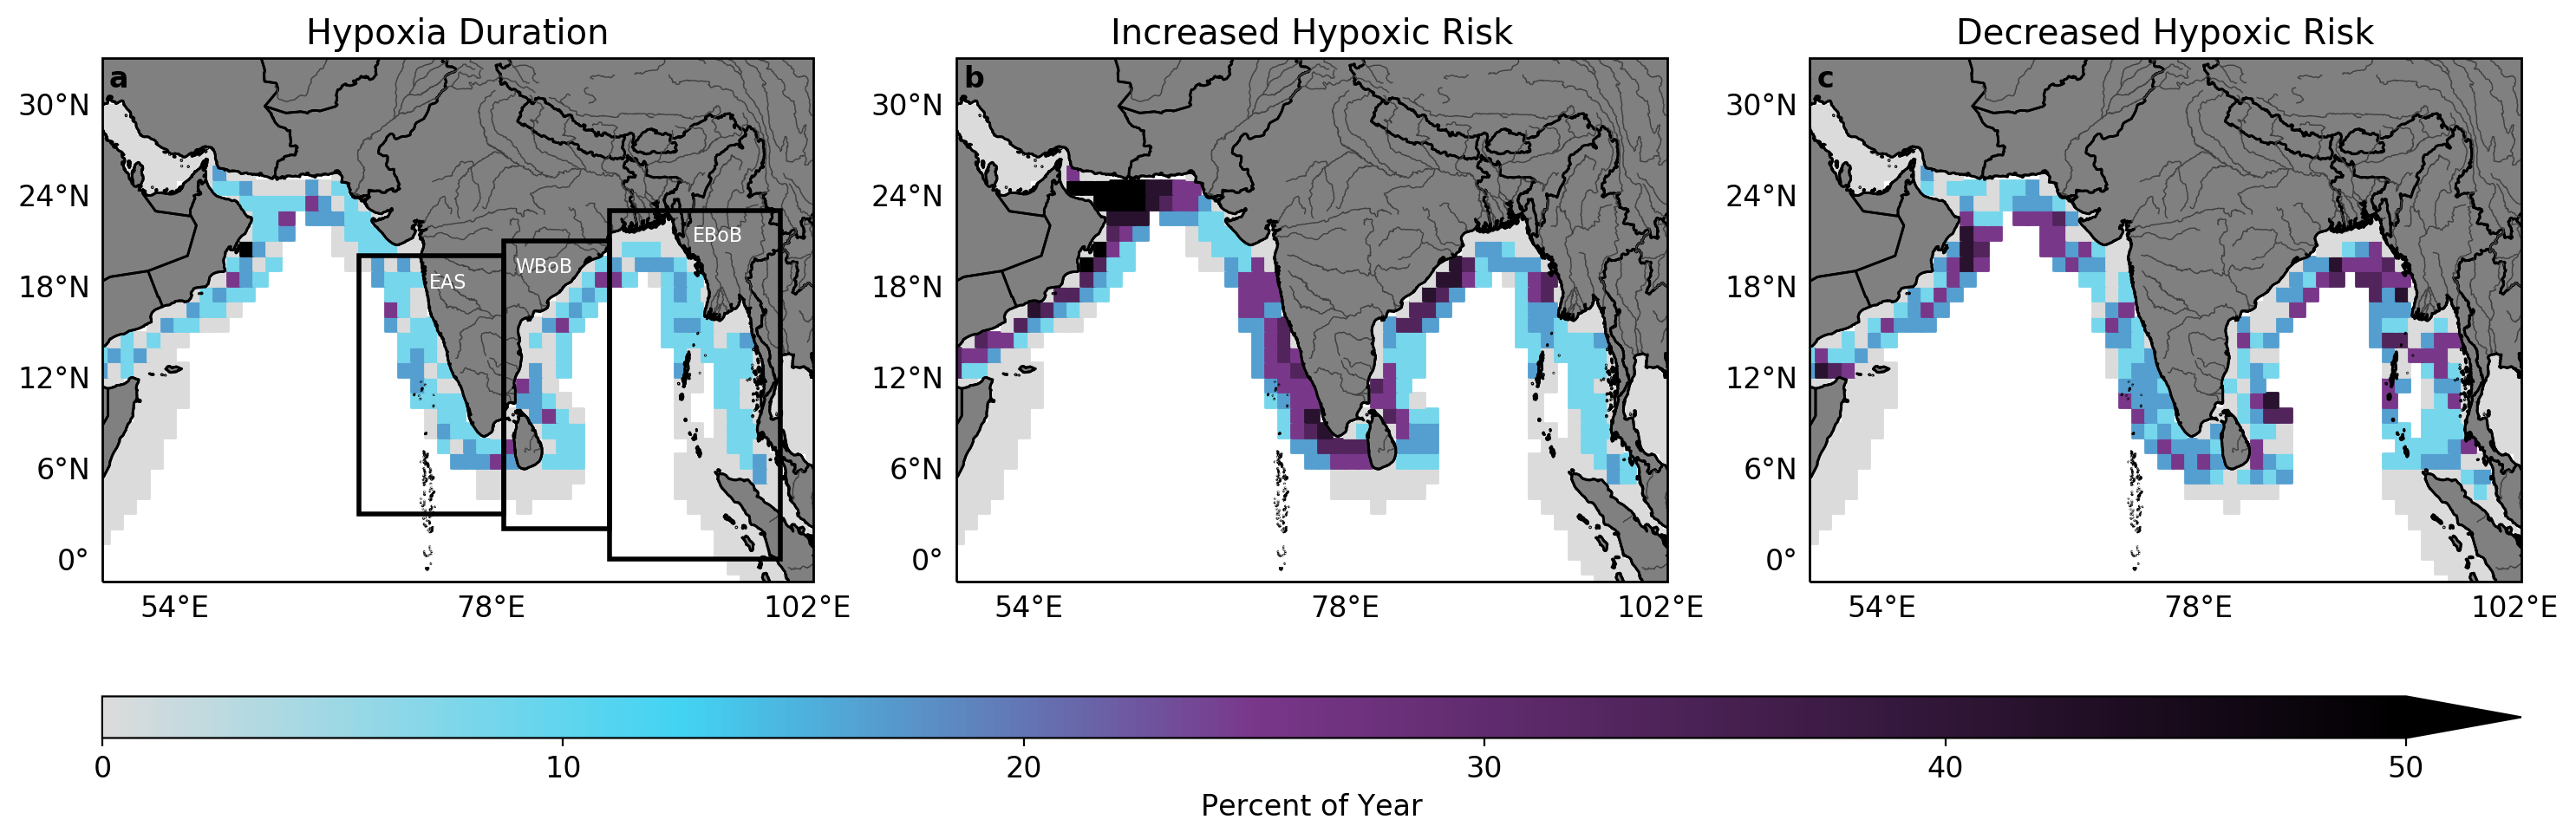

In [186]:
fig = plt.figure(figsize=(18,4),dpi=200)

sz = 35
fsz = 8

cmin = 0 
cmax = 50

# cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
#                            [0,0.25,0.5,1])
cmap = get_continuous_cmap(['#DcDcDc','#42d4f4','#7A378B','#000000'],
                           [0,0.25,0.5,1])
cbounds = [48.5,102.5,-1.5,33]


plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Hypoxia Duration','Increased Hypoxic Risk', 'Decreased Hypoxic Risk']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
# mon_title = ['jun','july','aug','sep','oct','nov','dec','jan','feb','mar','apr','may']



xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

zero_to_hyp_per_tmp = zero_to_hyp_per.flatten()[mask]
fifty_to_hyp_per_tmp = fifty_to_hyp_per.flatten()[mask]
hyp_to_80_per_tmp = hyp_to_80_per.flatten()[mask]


##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
p1 = ax.scatter(xx,yy,c = zero_to_hyp_per_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title(title[0])
# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.83,y=0.65, fontsize = 8, color = 'w')
add_letter(ax, 'a')


ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ax.scatter(xx,yy,c = fifty_to_hyp_per_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# ax.scatter(xx[inc_risk_p_tmp],yy[inc_risk_p_tmp],c = var2[inc_risk_p_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
# ax.scatter(xx[inc_risk_n_tmp],yy[inc_risk_n_tmp],c = var2[inc_risk_n_tmp],marker='s',s= sz+5,hatch = '///',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
# ax.scatter(xx[inc_risk_np_tmp],yy[inc_risk_np_tmp],c = var2[inc_risk_np_tmp],marker='s',s=sz+5,hatch = 'xxx',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[1])
add_letter(ax, 'b')


ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
p = ax.scatter(xx,yy,c = hyp_to_80_per_tmp,marker='s',s= sz,
               cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# ax.scatter(xx[dec_risk_p_tmp],yy[dec_risk_p_tmp],c = var2[dec_risk_p_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
# ax.scatter(xx[dec_risk_n_tmp],yy[dec_risk_n_tmp],c = var2[dec_risk_n_tmp],marker='s',s= sz+5,hatch = '///',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
# ax.scatter(xx[dec_risk_np_tmp],yy[dec_risk_np_tmp],c = var2[dec_risk_np_tmp],marker='s',s= sz+5,hatch = 'xxx',
#                       edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[2])
add_letter(ax, 'c')

import matplotlib.patches as mpatches

# circ1 = mpatches.Patch(facecolor='w',hatch='\\\\\\', label = 'Positive IOD Events')
# circ2 = mpatches.Patch(facecolor='w',hatch='///', label = 'Negative IOD Events')

# plt.legend(handles = [circ1,circ2],loc=3, ncol = 1, fontsize = 10, facecolor = 'lightgrey')

cbar_ax = fig.add_axes([0.125, -0.1, 0.775, 0.06])
cbar2 = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'max')
cbar2.set_label('Percent of Year')




# Hypoxia Severity 

In [ ]:
var = ds_WOA.doxy_50_200

#______________________________________________________
# month of lowest oxygen, value of lowest oxygen in shelf waters
#______________________________________________________
mons = np.arange(1,13)

min_mean = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
min_mean_mon = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)
min_mean_mon_SLA = np.full([len(ds_WOA.lat),len(ds_WOA.lon)],np.nan)

for ii,jj in itertools.product(np.arange(len(ds_WOA.lat)),np.arange(len(ds_WOA.lon))):
    doxy = var[:,ii,jj]
    
    if np.sum(doxy[np.isfinite(doxy)])>0:
        
        ind = np.nanargmin(doxy)

        min_mean[ii,jj] = doxy[ind]
                
        # shift this one so that you can plot dec first
        if mons[ind] == 12:
            min_mean_mon[ii,jj] = 1
            min_mean_mon_SLA[ii,jj] = mons[ind]
        else:
            min_mean_mon[ii,jj] = mons[ind]+1
            min_mean_mon_SLA[ii,jj] = mons[ind]
            
        if len(doxy[doxy == np.nanmin(doxy)])>1:
                print('Duplicate Values in Minimum.')
                

In [94]:
inc_risk_p = np.full(min_mean_mon_SLA.shape,False)
inc_risk_n = np.full(min_mean_mon_SLA.shape,False)
dec_risk_p = np.full(min_mean_mon_SLA.shape,False)
dec_risk_n = np.full(min_mean_mon_SLA.shape,False)
inc_risk_np = np.full(min_mean_mon_SLA.shape,False)
dec_risk_np = np.full(min_mean_mon_SLA.shape,False)

# find the months of minimum 02 and sign of SLA anomaly
for mm in range(1,13):
    temp_psla = posIOD_mon_sla_mon_anom[mm-1,:,:]
    temp_nsla = negIOD_mon_sla_mon_anom[mm-1,:,:]
    
    # find current month, and make sure sla is negative = upwelling
    ind = (min_mean_mon_SLA == mm) & (temp_psla<0)
    inc_risk_p[ind] = True
    
    # find current month, and make sure sla is positive = downwelling
    ind = (min_mean_mon_SLA == mm) & (temp_psla>0)
    dec_risk_p[ind] = True
    
    
    # find current month, and make sure sla is negative = upwelling
    ind = (min_mean_mon_SLA == mm) & (temp_nsla<0)
    inc_risk_n[ind] = True
    
    # find current month, and make sure sla is positive = downwelling
    ind = (min_mean_mon_SLA == mm) & (temp_nsla>0)
    dec_risk_n[ind] = True
    
    
ind = (inc_risk_n == True) & (inc_risk_p == True)
inc_risk_np[ind] = True

ind = (dec_risk_n == True) & (dec_risk_p == True)
dec_risk_np[ind] = True


# Plot

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less


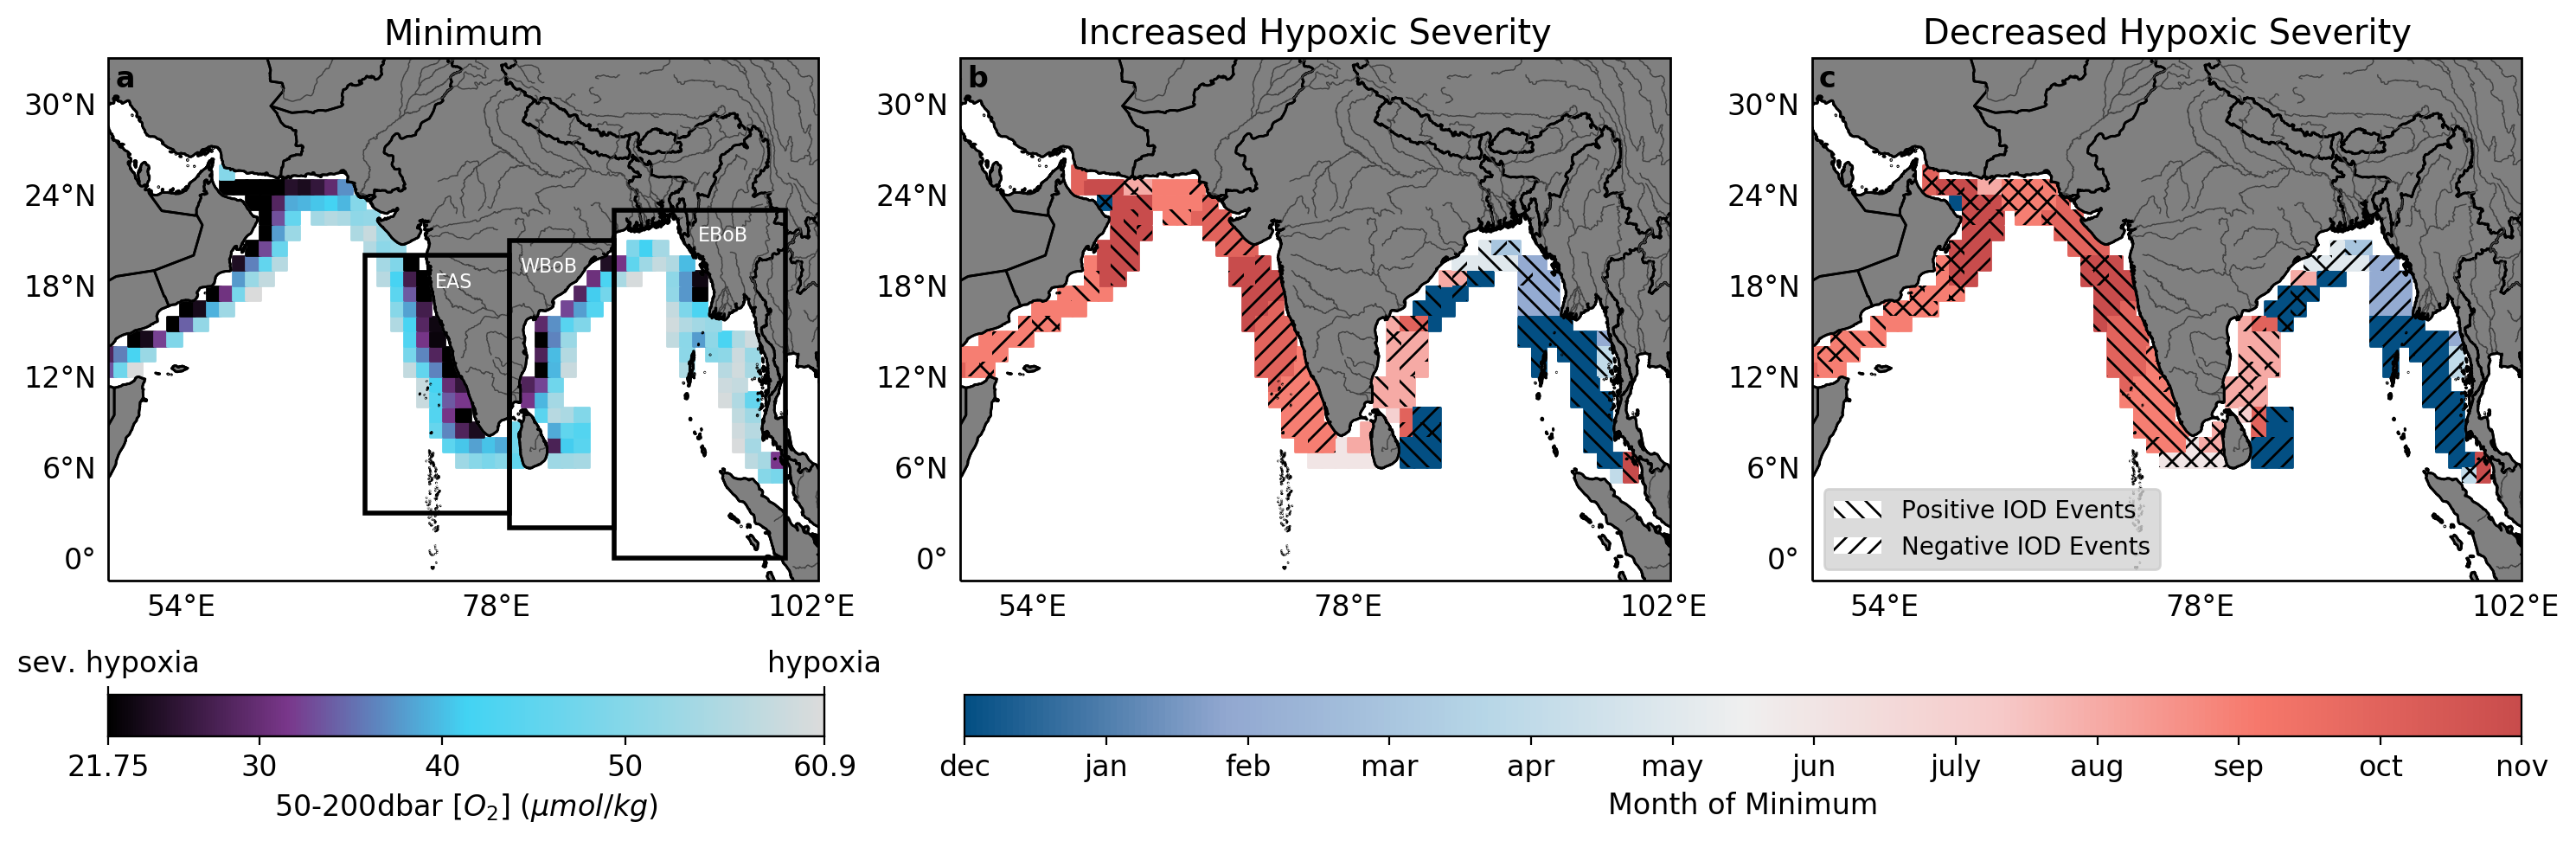

In [122]:
fig = plt.figure(figsize=(18,4),dpi=200)

hypoxic_thres = 60.9
severe_hyp_thres = 21.75
suboxia_thres = 4.35

sz = 35
fsz = 8

cmin1 = severe_hyp_thres
cmax1 = hypoxic_thres

cmin2 = 1
cmax2 = 12

cmap1 = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
                           [0,0.25,0.5,1])
# cmap1 = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
#                            [0,0.3,0.9,1])
cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

cbounds = [48.5,102.5,-1.5,33]


plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Minimum','Increased Hypoxic Severity', 'Decreased Hypoxic Severity']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
# mon_title = ['jun','july','aug','sep','oct','nov','dec','jan','feb','mar','apr','may']



xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

var1 = min_mean.flatten()[mask]
var2 = min_mean_mon.flatten()[mask]
inc_risk_p_tmp = inc_risk_p.flatten()[mask]
inc_risk_n_tmp = inc_risk_n.flatten()[mask]
dec_risk_p_tmp = dec_risk_p.flatten()[mask]
dec_risk_n_tmp = dec_risk_n.flatten()[mask]
dec_risk_np_tmp = dec_risk_np.flatten()[mask]
inc_risk_np_tmp = inc_risk_np.flatten()[mask]

#only keep data that was hypoxic at one month
var_hyp = min_mean.flatten()[mask]
mask_hyp = var_hyp < cmax1

var1 = var1[mask_hyp]
var2 = var2[mask_hyp]
inc_risk_p_tmp = inc_risk_p_tmp[mask_hyp]
inc_risk_n_tmp = inc_risk_n_tmp[mask_hyp]
dec_risk_p_tmp = dec_risk_p_tmp[mask_hyp]
dec_risk_n_tmp = dec_risk_n_tmp[mask_hyp]
inc_risk_np_tmp = inc_risk_np_tmp[mask_hyp]
dec_risk_np_tmp = dec_risk_np_tmp[mask_hyp]
xx = xx[mask_hyp]
yy = yy[mask_hyp]

# hatch data where risk
# hatch_var_piod



##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
p1 = ax.scatter(xx,yy,c = var1,marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
ax.set_title(title[0])
# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.83,y=0.65, fontsize = 8, color = 'w')
add_letter(ax, 'a')


ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_p_tmp],yy[inc_risk_p_tmp],c = var2[inc_risk_p_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_n_tmp],yy[inc_risk_n_tmp],c = var2[inc_risk_n_tmp],marker='s',s= sz+5,hatch = '///',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_np_tmp],yy[inc_risk_np_tmp],c = var2[inc_risk_np_tmp],marker='s',s=sz+5,hatch = 'xxx',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[1])
add_letter(ax, 'b')


ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
p2 = ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_p_tmp],yy[dec_risk_p_tmp],c = var2[dec_risk_p_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_n_tmp],yy[dec_risk_n_tmp],c = var2[dec_risk_n_tmp],marker='s',s= sz+5,hatch = '///',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_np_tmp],yy[dec_risk_np_tmp],c = var2[dec_risk_np_tmp],marker='s',s= sz+5,hatch = 'xxx',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[2])
add_letter(ax, 'c')

import matplotlib.patches as mpatches

circ1 = mpatches.Patch(facecolor='w',hatch='\\\\\\', label = 'Positive IOD Events')
circ2 = mpatches.Patch(facecolor='w',hatch='///', label = 'Negative IOD Events')
circ3 = mpatches.Patch(facecolor='w',hatch='xxx', label = 'Negative IOD Events')

plt.legend(handles = [circ1,circ2],loc=3, ncol = 1, fontsize = 10, facecolor = 'lightgrey')


cbar_ax = fig.add_axes([0.125, -0.1, 0.23, 0.06])
cbar_ax2 = cbar_ax.twiny()
# cbar = fig.colorbar(p1,cax=cbar_ax, pad=0.04, orientation = 'horizontal',
#                    ticks = [4.35,21.75,60.9])
# cbar.set_ticklabels(['suboxia','sev. hypoxia','hypoxia'])
cbar = fig.colorbar(p1,cax=cbar_ax, pad=0.04, orientation = 'horizontal',
                   ticks = [21.75,30,40,50,60.9])
cbar.set_ticklabels(['21.75','30','40','50','60.9'])
cbar_ax2.set_xticks([0,1])
cbar_ax2.set_xticklabels(['sev. hypoxia','hypoxia'])
# cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')


cbar_ax = fig.add_axes([0.4, -0.1, 0.5, 0.06])
cbar2 = fig.colorbar(p2,cax=cbar_ax, pad=0.04, orientation = 'horizontal',ticks = np.arange(1,13))
# cbar2.ax.xaxis.set_ticks_position("top")
cbar2.set_label('Month of Minimum')
cbar2.set_ticklabels(mon_title)



/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less


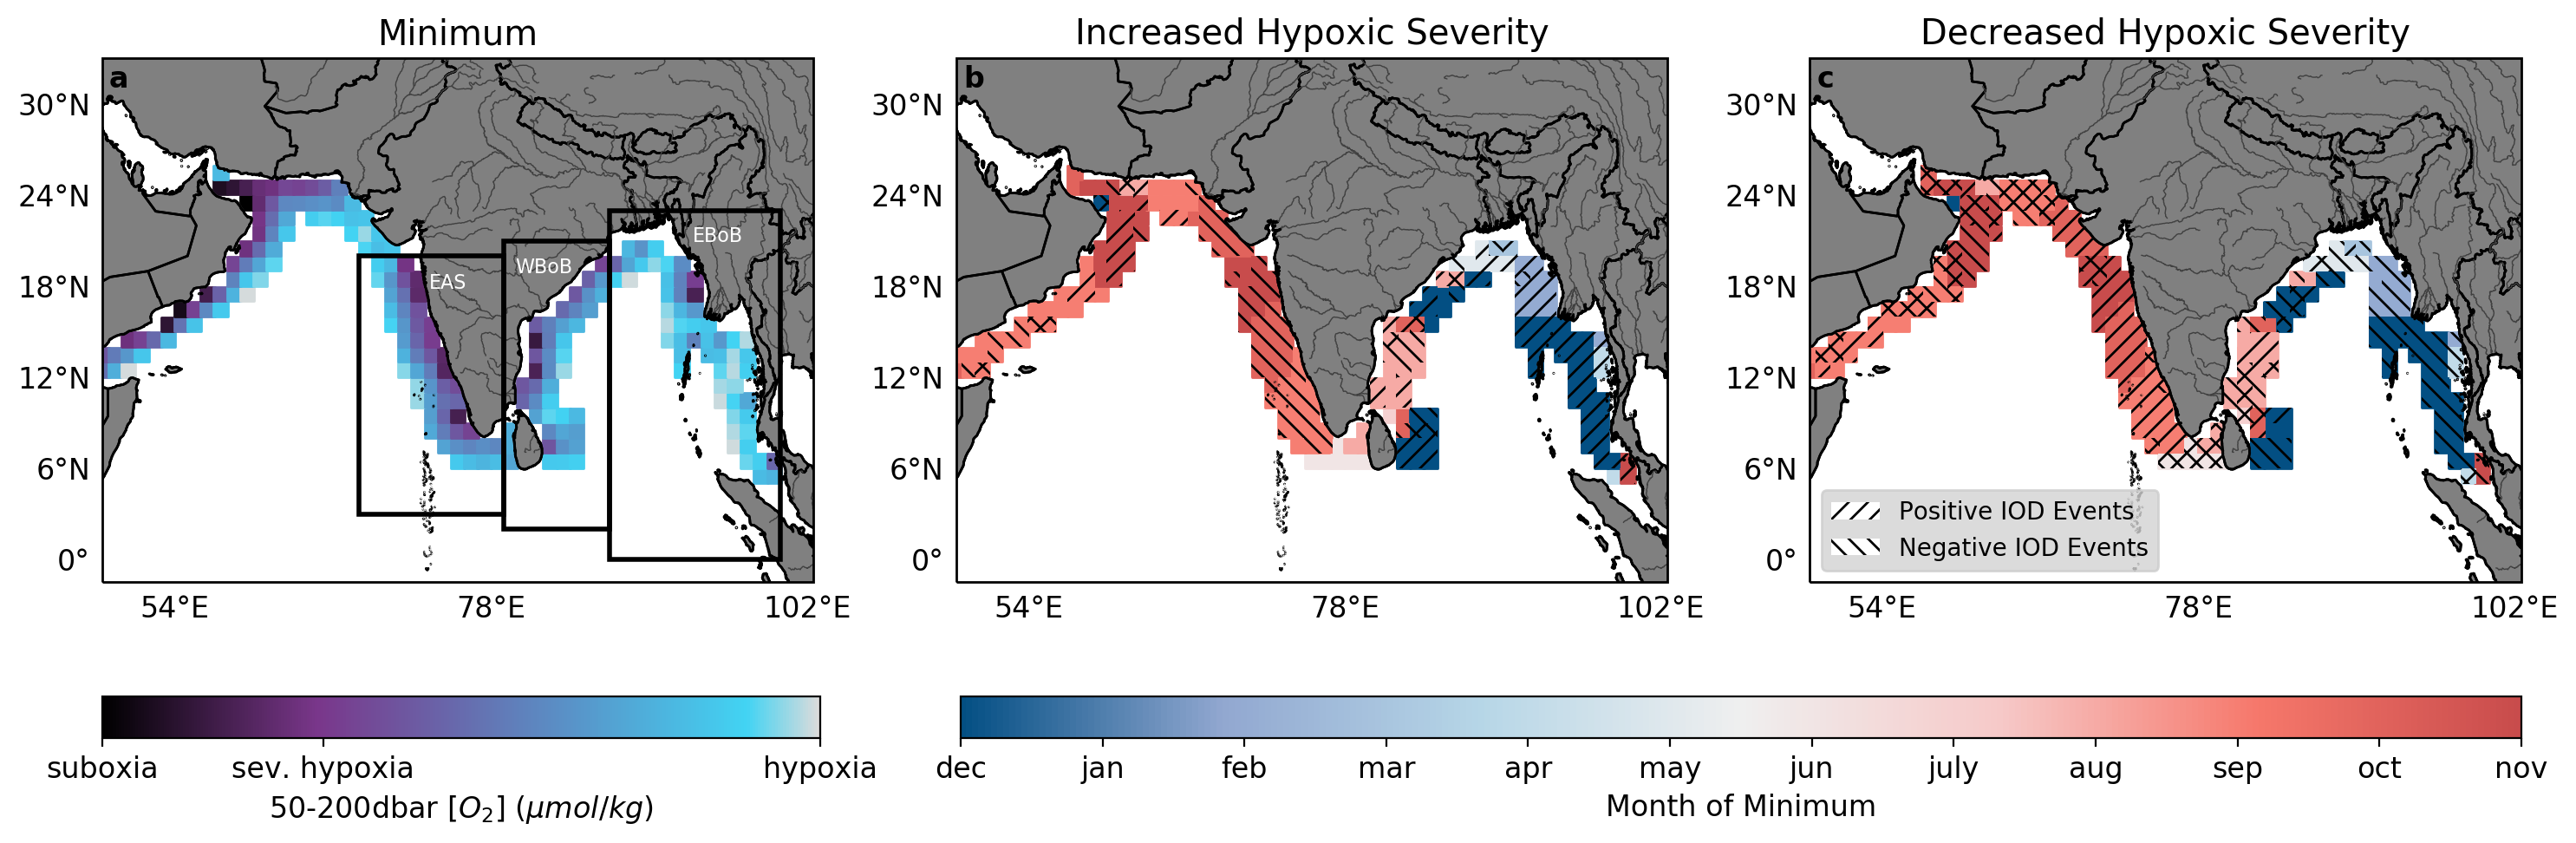

In [115]:
fig = plt.figure(figsize=(18,4),dpi=200)

hypoxic_thres = 60.9
severe_hyp_thres = 21.75
suboxia_thres = 4.35

sz = 35
fsz = 8

cmin1 = suboxia_thres
cmax1 = hypoxic_thres

cmin2 = 1
cmax2 = 12

# cmap1 = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
#                            [0,0.59,0.65, 1]),'#DcDcDc'
cmap1 = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
                           [0,0.3,0.9,1])
# [0,0.35,0.8,1])
cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
# cmap2 = get_continuous_cmap(['#c94c4c','#f7786b','#f7cac9','#f0f0f0','#b7d7e8','#92a8d1','#034f84'])
# cmap2 = plt.cm.jet

# cbounds = [45,100,0,30]
cbounds = [48.5,102.5,-1.5,33]


plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Minimum','Increased Hypoxic Severity', 'Decreased Hypoxic Severity']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
# mon_title = ['jun','july','aug','sep','oct','nov','dec','jan','feb','mar','apr','may']



xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

var1 = min_mean.flatten()[mask]
var2 = min_mean_mon.flatten()[mask]
inc_risk_p_tmp = inc_risk_p.flatten()[mask]
inc_risk_n_tmp = inc_risk_n.flatten()[mask]
dec_risk_p_tmp = dec_risk_p.flatten()[mask]
dec_risk_n_tmp = dec_risk_n.flatten()[mask]
dec_risk_np_tmp = dec_risk_np.flatten()[mask]
inc_risk_np_tmp = inc_risk_np.flatten()[mask]

#only keep data that was hypoxic at one month
var_hyp = min_mean.flatten()[mask]
mask_hyp = var_hyp < cmax1

var1 = var1[mask_hyp]
var2 = var2[mask_hyp]
inc_risk_p_tmp = inc_risk_p_tmp[mask_hyp]
inc_risk_n_tmp = inc_risk_n_tmp[mask_hyp]
dec_risk_p_tmp = dec_risk_p_tmp[mask_hyp]
dec_risk_n_tmp = dec_risk_n_tmp[mask_hyp]
inc_risk_np_tmp = inc_risk_np_tmp[mask_hyp]
dec_risk_np_tmp = dec_risk_np_tmp[mask_hyp]
xx = xx[mask_hyp]
yy = yy[mask_hyp]

# hatch data where risk
# hatch_var_piod



##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
p1 = ax.scatter(xx,yy,c = var1,marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
ax.set_title(title[0])
# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.83,y=0.65, fontsize = 8, color = 'w')
add_letter(ax, 'a')


ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_p_tmp],yy[inc_risk_p_tmp],c = var2[inc_risk_p_tmp],marker='s',s= sz+5,hatch = '///',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_n_tmp],yy[inc_risk_n_tmp],c = var2[inc_risk_n_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[inc_risk_np_tmp],yy[inc_risk_np_tmp],c = var2[inc_risk_np_tmp],marker='s',s=sz+5,hatch = 'xxx',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[1])
add_letter(ax, 'b')


ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
p2 = ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_p_tmp],yy[dec_risk_p_tmp],c = var2[dec_risk_p_tmp],marker='s',s= sz+5,hatch = '///',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_n_tmp],yy[dec_risk_n_tmp],c = var2[dec_risk_n_tmp],marker='s',s= sz+5,hatch = '\\\\\\',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_np_tmp],yy[dec_risk_np_tmp],c = var2[dec_risk_np_tmp],marker='s',s= sz+5,hatch = 'xxx',
                      edgecolor='black', linewidth=0,cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[2])
add_letter(ax, 'c')

import matplotlib.patches as mpatches

circ1 = mpatches.Patch(facecolor='w',hatch='///', label = 'Positive IOD Events')
circ2 = mpatches.Patch(facecolor='w',hatch='\\\\\\', label = 'Negative IOD Events')
circ3 = mpatches.Patch(facecolor='w',hatch='xxx', label = 'Negative IOD Events')

plt.legend(handles = [circ1,circ2],loc=3, ncol = 1, fontsize = 10, facecolor = 'lightgrey')


cbar_ax = fig.add_axes([0.125, -0.1, 0.23, 0.06])
cbar = fig.colorbar(p1,cax=cbar_ax, pad=0.04, orientation = 'horizontal',
                   ticks = [4.35,21.75,60.9])
cbar.set_ticklabels(['suboxia','sev. hypoxia','hypoxia'])
# cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')


cbar_ax = fig.add_axes([0.4, -0.1, 0.5, 0.06])
cbar2 = fig.colorbar(p2,cax=cbar_ax, pad=0.04, orientation = 'horizontal',ticks = np.arange(1,13))
# cbar2.ax.xaxis.set_ticks_position("top")
cbar2.set_label('Month of Minimum')
cbar2.set_ticklabels(mon_title)




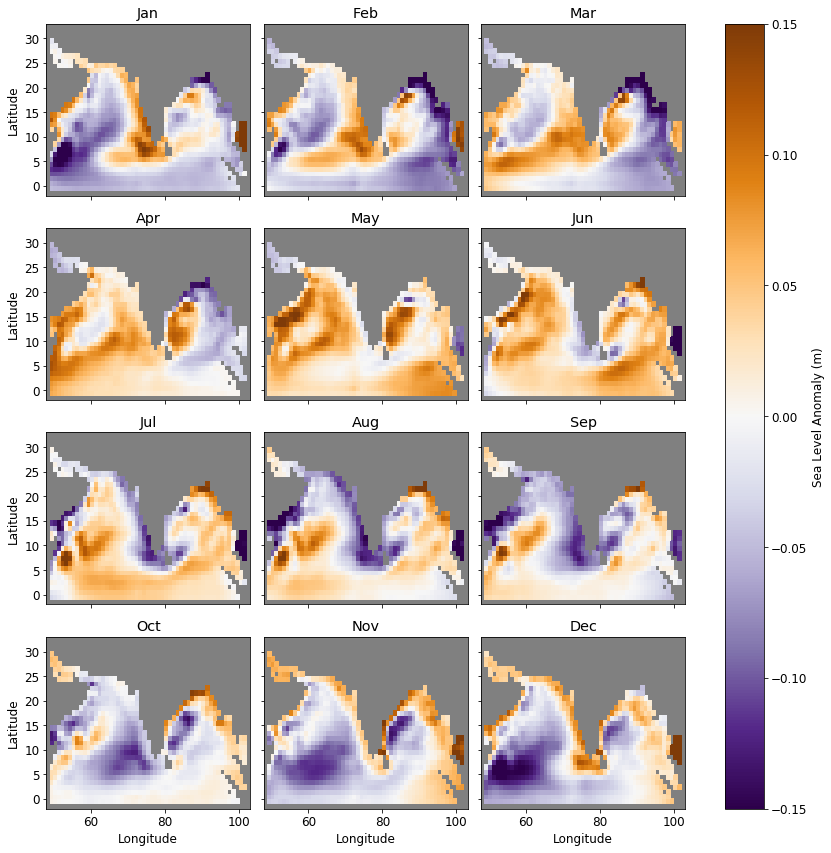

In [70]:
# posIOD
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

p = ds_SLA.mon_sla_mon_clim.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

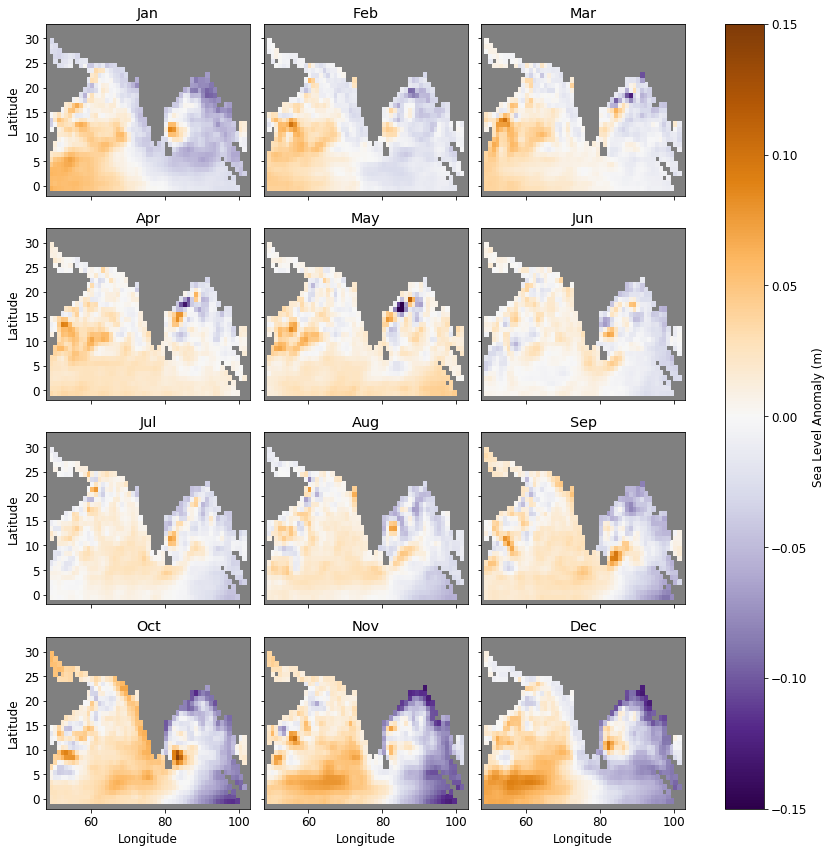

In [69]:
# posIOD
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

p = posIOD_mon_sla_mon_anom.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap="PuOr_r",
                                        vmax=0.15,vmin=-0.15, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Level Anomaly (m)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less


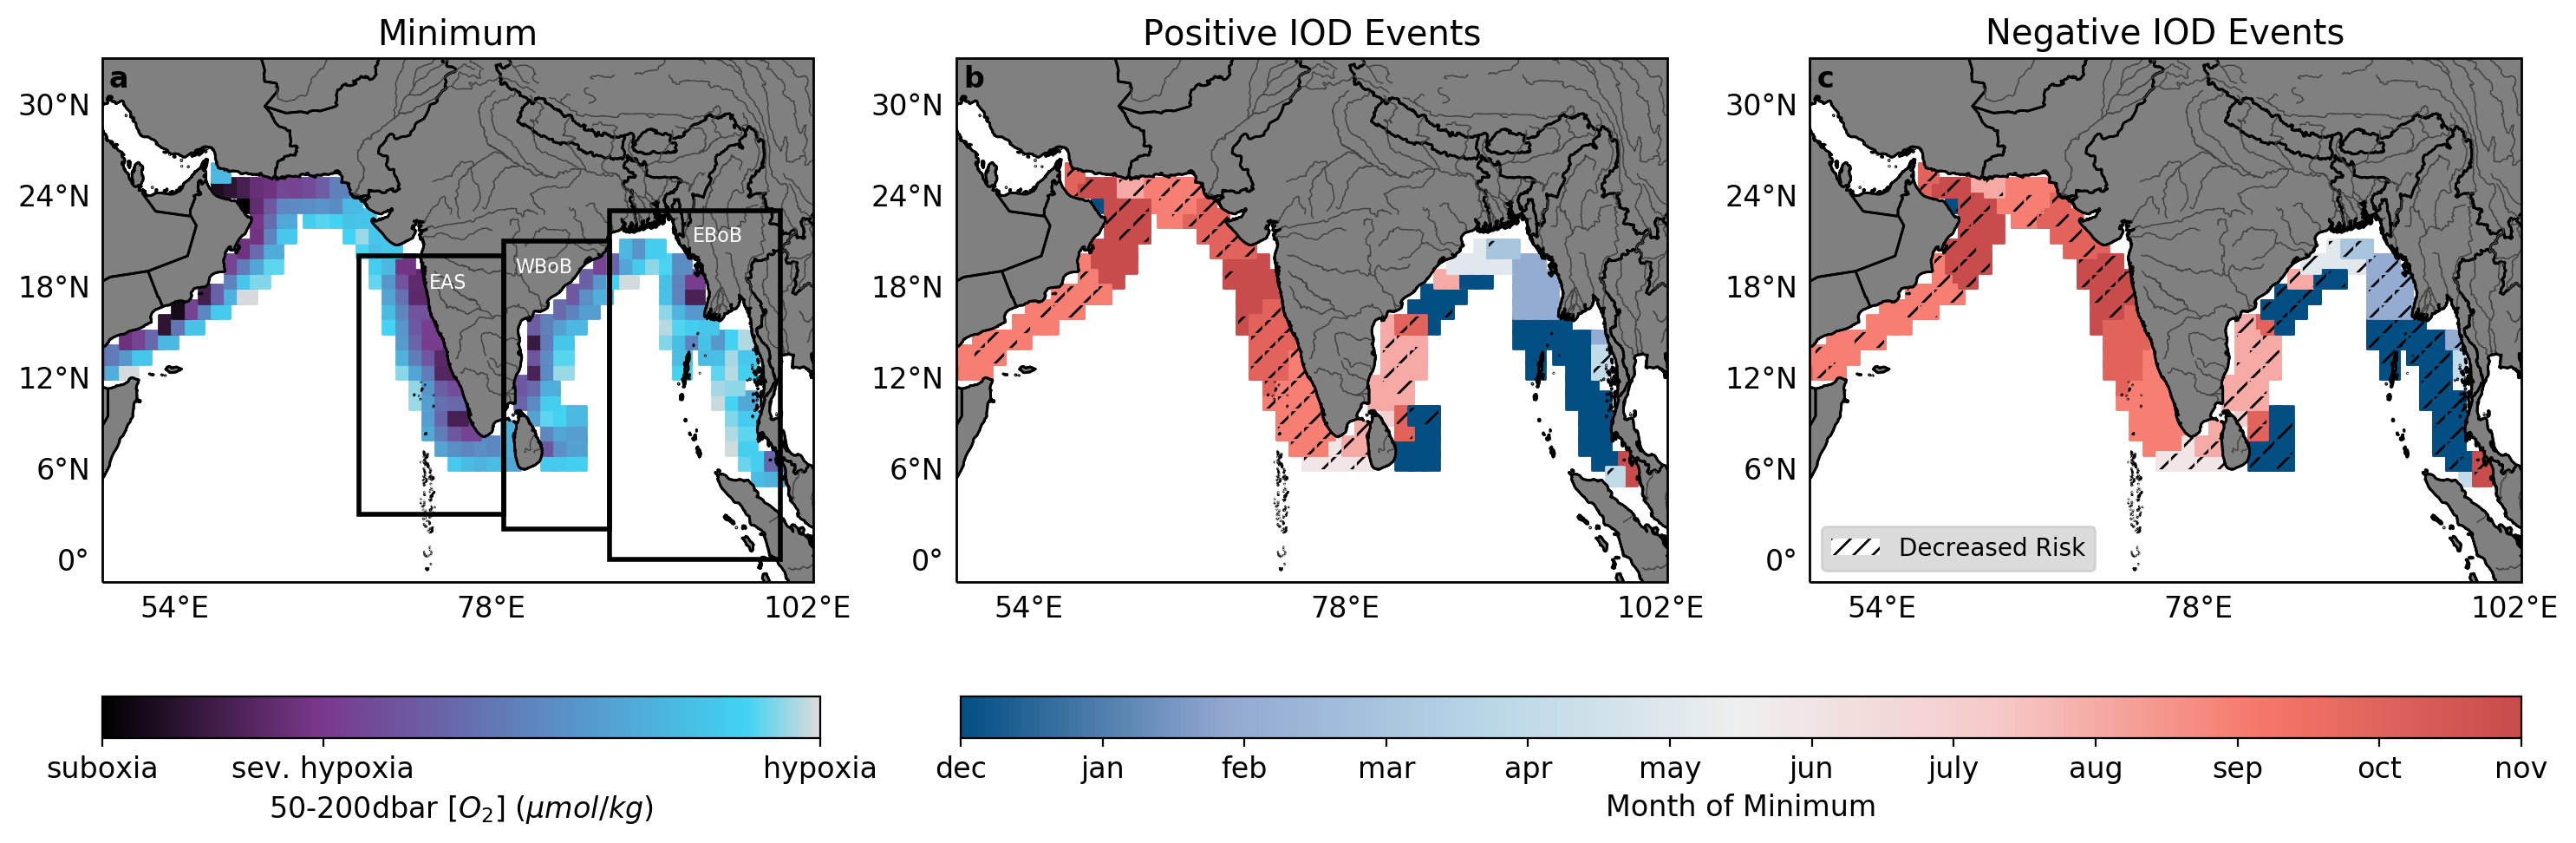

In [48]:
fig = plt.figure(figsize=(18,4),dpi=200)

hypoxic_thres = 60.9
severe_hyp_thres = 21.75
suboxia_thres = 4.35

sz = 60
fsz = 8

cmin1 = suboxia_thres
cmax1 = hypoxic_thres

cmin2 = 1
cmax2 = 12

# cmap1 = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
#                            [0,0.59,0.65, 1]),'#DcDcDc'
cmap1 = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#DcDcDc'],
                           [0,0.3,0.9,1])
# [0,0.35,0.8,1])
cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
# cmap2 = get_continuous_cmap(['#c94c4c','#f7786b','#f7cac9','#f0f0f0','#b7d7e8','#92a8d1','#034f84'])


# cbounds = [45,100,0,30]
cbounds = [48.5,102.5,-1.5,33]


plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Minimum','Positive IOD Events', 'Negative IOD Events']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
# mon_title = ['jun','july','aug','sep','oct','nov','dec','jan','feb','mar','apr','may']


xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

var1 = min_mean.flatten()[mask]
var2 = min_mean_mon.flatten()[mask]
inc_risk_p_tmp = inc_risk_p.flatten()[mask]
inc_risk_n_tmp = inc_risk_n.flatten()[mask]
dec_risk_p_tmp = dec_risk_p.flatten()[mask]
dec_risk_n_tmp = dec_risk_n.flatten()[mask]

#only keep data that was hypoxic at one month
var_hyp = min_mean.flatten()[mask]
mask_hyp = var_hyp < cmax1

var1 = var1[mask_hyp]
var2 = var2[mask_hyp]
inc_risk_p_tmp = inc_risk_p_tmp[mask_hyp]
inc_risk_n_tmp = inc_risk_n_tmp[mask_hyp]
dec_risk_p_tmp = dec_risk_p_tmp[mask_hyp]
dec_risk_n_tmp = dec_risk_n_tmp[mask_hyp]
xx = xx[mask_hyp]
yy = yy[mask_hyp]

# hatch data where risk
# hatch_var_piod



##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
p1 = ax.scatter(xx,yy,c = var1,marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
ax.set_title(title[0])
# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.83,y=0.65, fontsize = 8, color = 'w')
add_letter(ax, 'a')


ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_p_tmp],yy[dec_risk_p_tmp],c = var2[dec_risk_p_tmp],marker='s',s= sz,hatch = '//',
                      cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[1])
add_letter(ax, 'b')


ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
p2 = ax.scatter(xx,yy,c = var2,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
ax.scatter(xx[dec_risk_n_tmp],yy[dec_risk_n_tmp],c = var2[dec_risk_n_tmp],marker='s',s= sz,hatch = '//',
                      cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
g = add_land(ax, cbounds, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title(title[2])
add_letter(ax, 'c')

import matplotlib.patches as mpatches

circ1 = mpatches.Patch(facecolor='w',hatch='///', label = 'Decreased Risk')

plt.legend(handles = [circ1],loc=3, ncol = 1, fontsize = 10, facecolor = 'lightgrey')


cbar_ax = fig.add_axes([0.125, -0.1, 0.23, 0.06])
cbar = fig.colorbar(p1,cax=cbar_ax, pad=0.04, orientation = 'horizontal',
                   ticks = [4.35,21.75,60.9])
cbar.set_ticklabels(['suboxia','sev. hypoxia','hypoxia'])
# cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')


cbar_ax = fig.add_axes([0.4, -0.1, 0.5, 0.06])
cbar2 = fig.colorbar(p2,cax=cbar_ax, pad=0.04, orientation = 'horizontal',ticks = np.arange(1,13))
# cbar2.ax.xaxis.set_ticks_position("top")
cbar2.set_label('Month of Minimum')
cbar2.set_ticklabels(mon_title)




In [50]:
var = seasonal_mean
ann_mean = np.array(ann_mean)

fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(14,7),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmap = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
                           [0,0.59,0.65, 1])
cmin = 0
cmax = 100

xx,yy = np.meshgrid(ds_WOA.lon,ds_WOA.lat)
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

plt.rcParams.update({'font.size': 14})
season_title = ['Annual Mean', 'Summer/Fall', 'Winter/Spring']

levels = np.linspace(-0.15,0.15,10)

cbounds = [45,100,0,30]


##############################################################

ax = axes[0,0]
tmp = var[0,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())

hatch_mask = np.full(min_mean.shape,1)
hatch_mask = hatch_mask.flatten()[mask]

ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,hatch = '//',
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())

ax.set_title(season_title[1])
ax.text(-0.15, 0.5, 'Positive IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 18)
add_land(ax, cbounds)
add_letter(ax, 'a', x = 0.01, y = .93)

ax = axes[0,1]

tmp = var[1,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
add_letter(ax, 'b', x = 0.01, y = .93)

ax.set_title(season_title[2])

ax = axes[1,0]
tmp = var[0,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.text(-0.15, 0.5, 'Negative IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 18)
add_land(ax, cbounds)
add_letter(ax, 'c', x = 0.01, y = .93)

ax = axes[1,1]

tmp = var[1,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
add_letter(ax, 'd', x = 0.01, y = .93)




neg = plt.Line2D((0, 1), (0, 0), color='k', linestyle='--', linewidth=2)
pos = plt.Line2D((0, 1), (0, 0), color='k', linestyle='-', linewidth=2)

# l = plt.legend([neg,pos],['upwelling', 'downwelling'],facecolor = 'w')
# plt.setp(l.get_texts(), color='w');

cbar_ax = fig.add_axes([0.13, -0.05, 0.75, 0.04])
cbar_anom = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar_anom.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')




NameError: name 'seasonal_mean' is not defined

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


IndexError: boolean index did not match indexed array along dimension 0; dimension is 221 but corresponding boolean dimension is 460

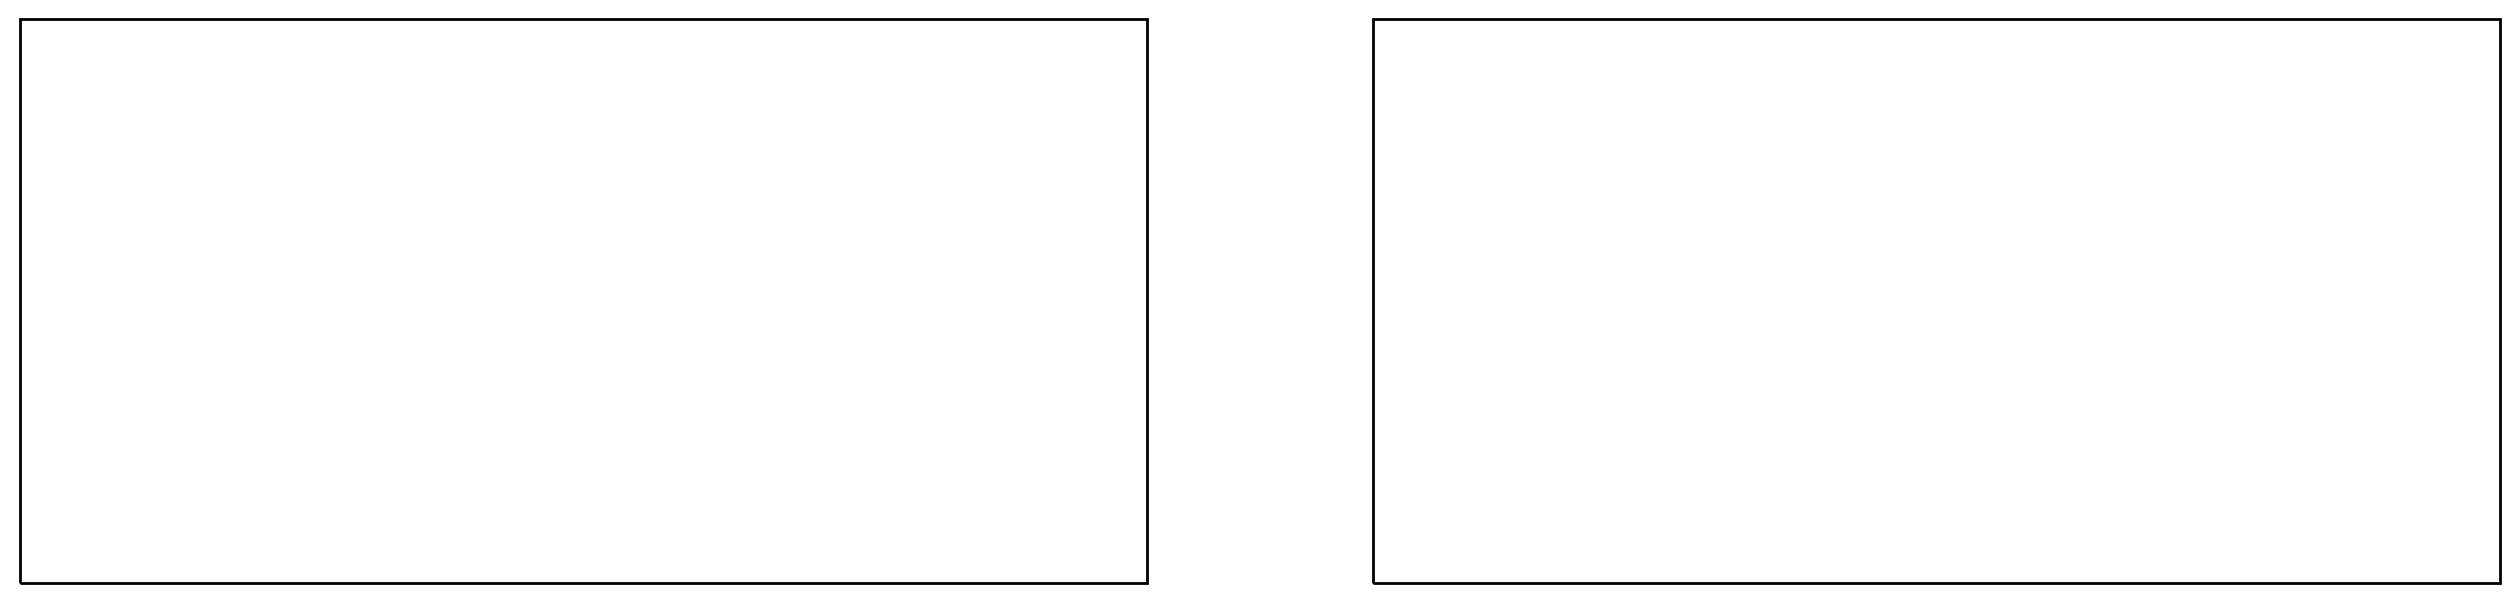

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(16,4),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmin1 = 0
cmax1 = 100

cmin2 = 1
cmax2 = 12

cmap1 = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
                           [0,0.59,0.65, 1])
cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

cbounds = [45,100,0,30]


# plt.rcParams.update({'legend.fontsize': 16,
#                      'legend.handlelength': 2,
#                      "legend.markerscale":2,
#                      'font.size': 12})

title = ['Increased Hypoxic Risk', 'Decreased Hypoxic Risk']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

var = min_mean_mon.flatten()[mask]

#only keep data that was hypoxic at one month
hatch_var_hyp = min_mean.flatten()[mask]
hatch_mask_hyp = hatch_var_hyp < 63

var = var[hatch_mask_hyp]
xx = xx[hatch_mask_hyp]
yy = yy[hatch_mask_hyp]

# hatch data where risk
# hatch_var_piod



##############################################################

ax = axes[0]
ax.scatter(xx,yy,c = var,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
ax.set_title(title[0])
add_letter(ax, 'a', x = 0.01, y = .925)


ax = axes[1]
p2 = ax.scatter(xx,yy,c = var,marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
ax.set_title(title[1])
add_letter(ax, 'b', x = 0.01, y = .925)

cbar_ax = fig.add_axes([0.13, -0.1, 0.75, 0.07])
cbar2 = fig.colorbar(p2,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both',ticks = np.arange(1,13))
cbar2.set_label('Month of Minimum 50-200dbar [$O_2$]')
cbar2.set_ticklabels(mon_title)




In [ ]:
var1 = min_mean
var2 = min_mean_mon
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(16,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmin1 = 0
cmax1 = 200

cmin2 = 1
cmax2 = 12

cmap1 = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
                           [0,0.59,0.65, 1])
cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

cbounds = [45,100,0,30]


xx,yy = np.meshgrid(ds_WOA.lon,ds_WOA.lat)
xx = xx.flatten()
yy = yy.flatten()

# plt.rcParams.update({'legend.fontsize': 16,
#                      'legend.handlelength': 2,
#                      "legend.markerscale":2,
#                      'font.size': 12})

title = ['Minimum','Month of Minimum']
mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']
##############################################################

ax = axes[0]
tmp = var1.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
ax.set_title(title[0])
add_land(ax, cbounds)
add_letter(ax, 'a', x = 0.01, y = .93)

cbar = plt.colorbar(p, ax = ax,orientation='horizontal', extend= 'max',
                   ticks = np.arange(0,120,20))
cbar.set_ticklabels(['0','20','40', 'hypoxia', '80','100'])
cbar.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')

ax = axes[1]
tmp = var2.flatten()

p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
               cmap=cmap2,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
    
cbar2 = plt.colorbar(p, ax = ax,orientation='horizontal', extend= 'both',
                    ticks = np.arange(1,13))
cbar2.set_ticklabels(mon_title)
add_land(ax, cbounds)
ax.set_title(title[1])
add_letter(ax, 'b', x = 0.01, y = .925)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 221 but corresponding boolean dimension is 1925

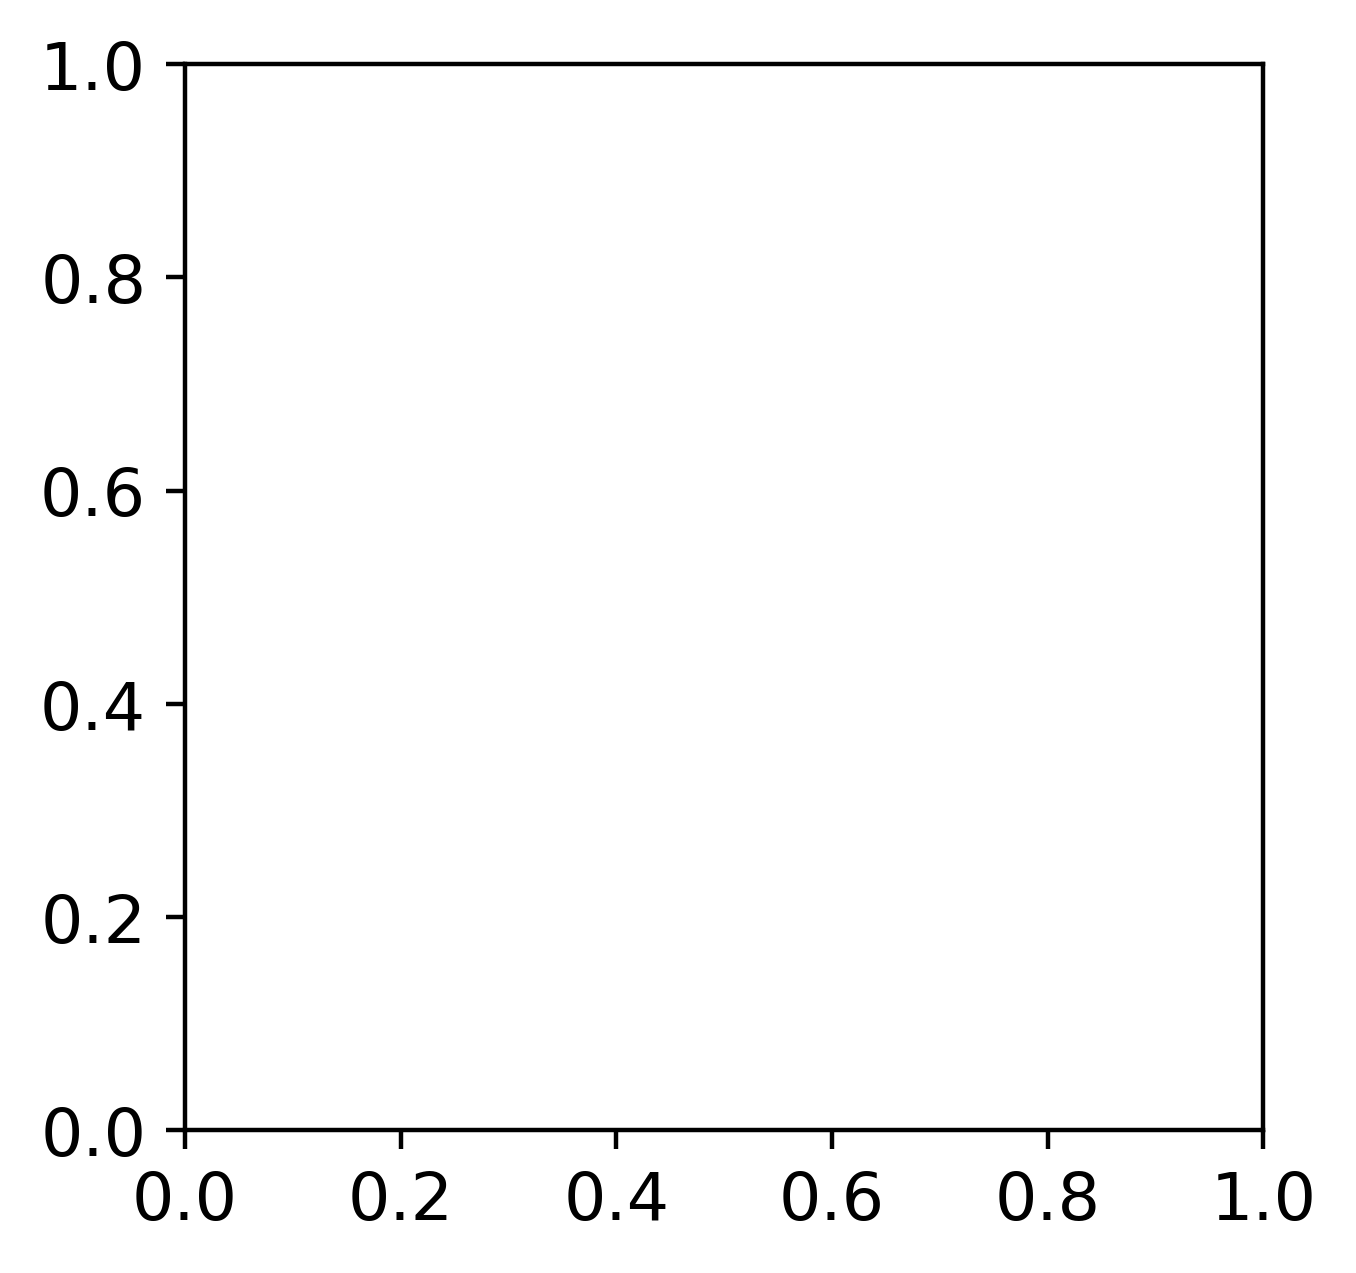

In [49]:
var = np.array(ds_WOA.doxy_50_200)

fig = plt.figure(figsize=(16, 12), dpi=400)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cmap = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e','#c94c4c'],
                           [0,0.5,0.65, 0.85,1])   
cmin = 0
cmax = 120
for tt in range(1,13):
    tmp = var[tt-1,:,:]
    tmp = tmp.flatten()
    ax = fig.add_subplot(3,4,tt)
    p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax)
    ax.set_title(months[tt-1])
plt.colorbar(p)

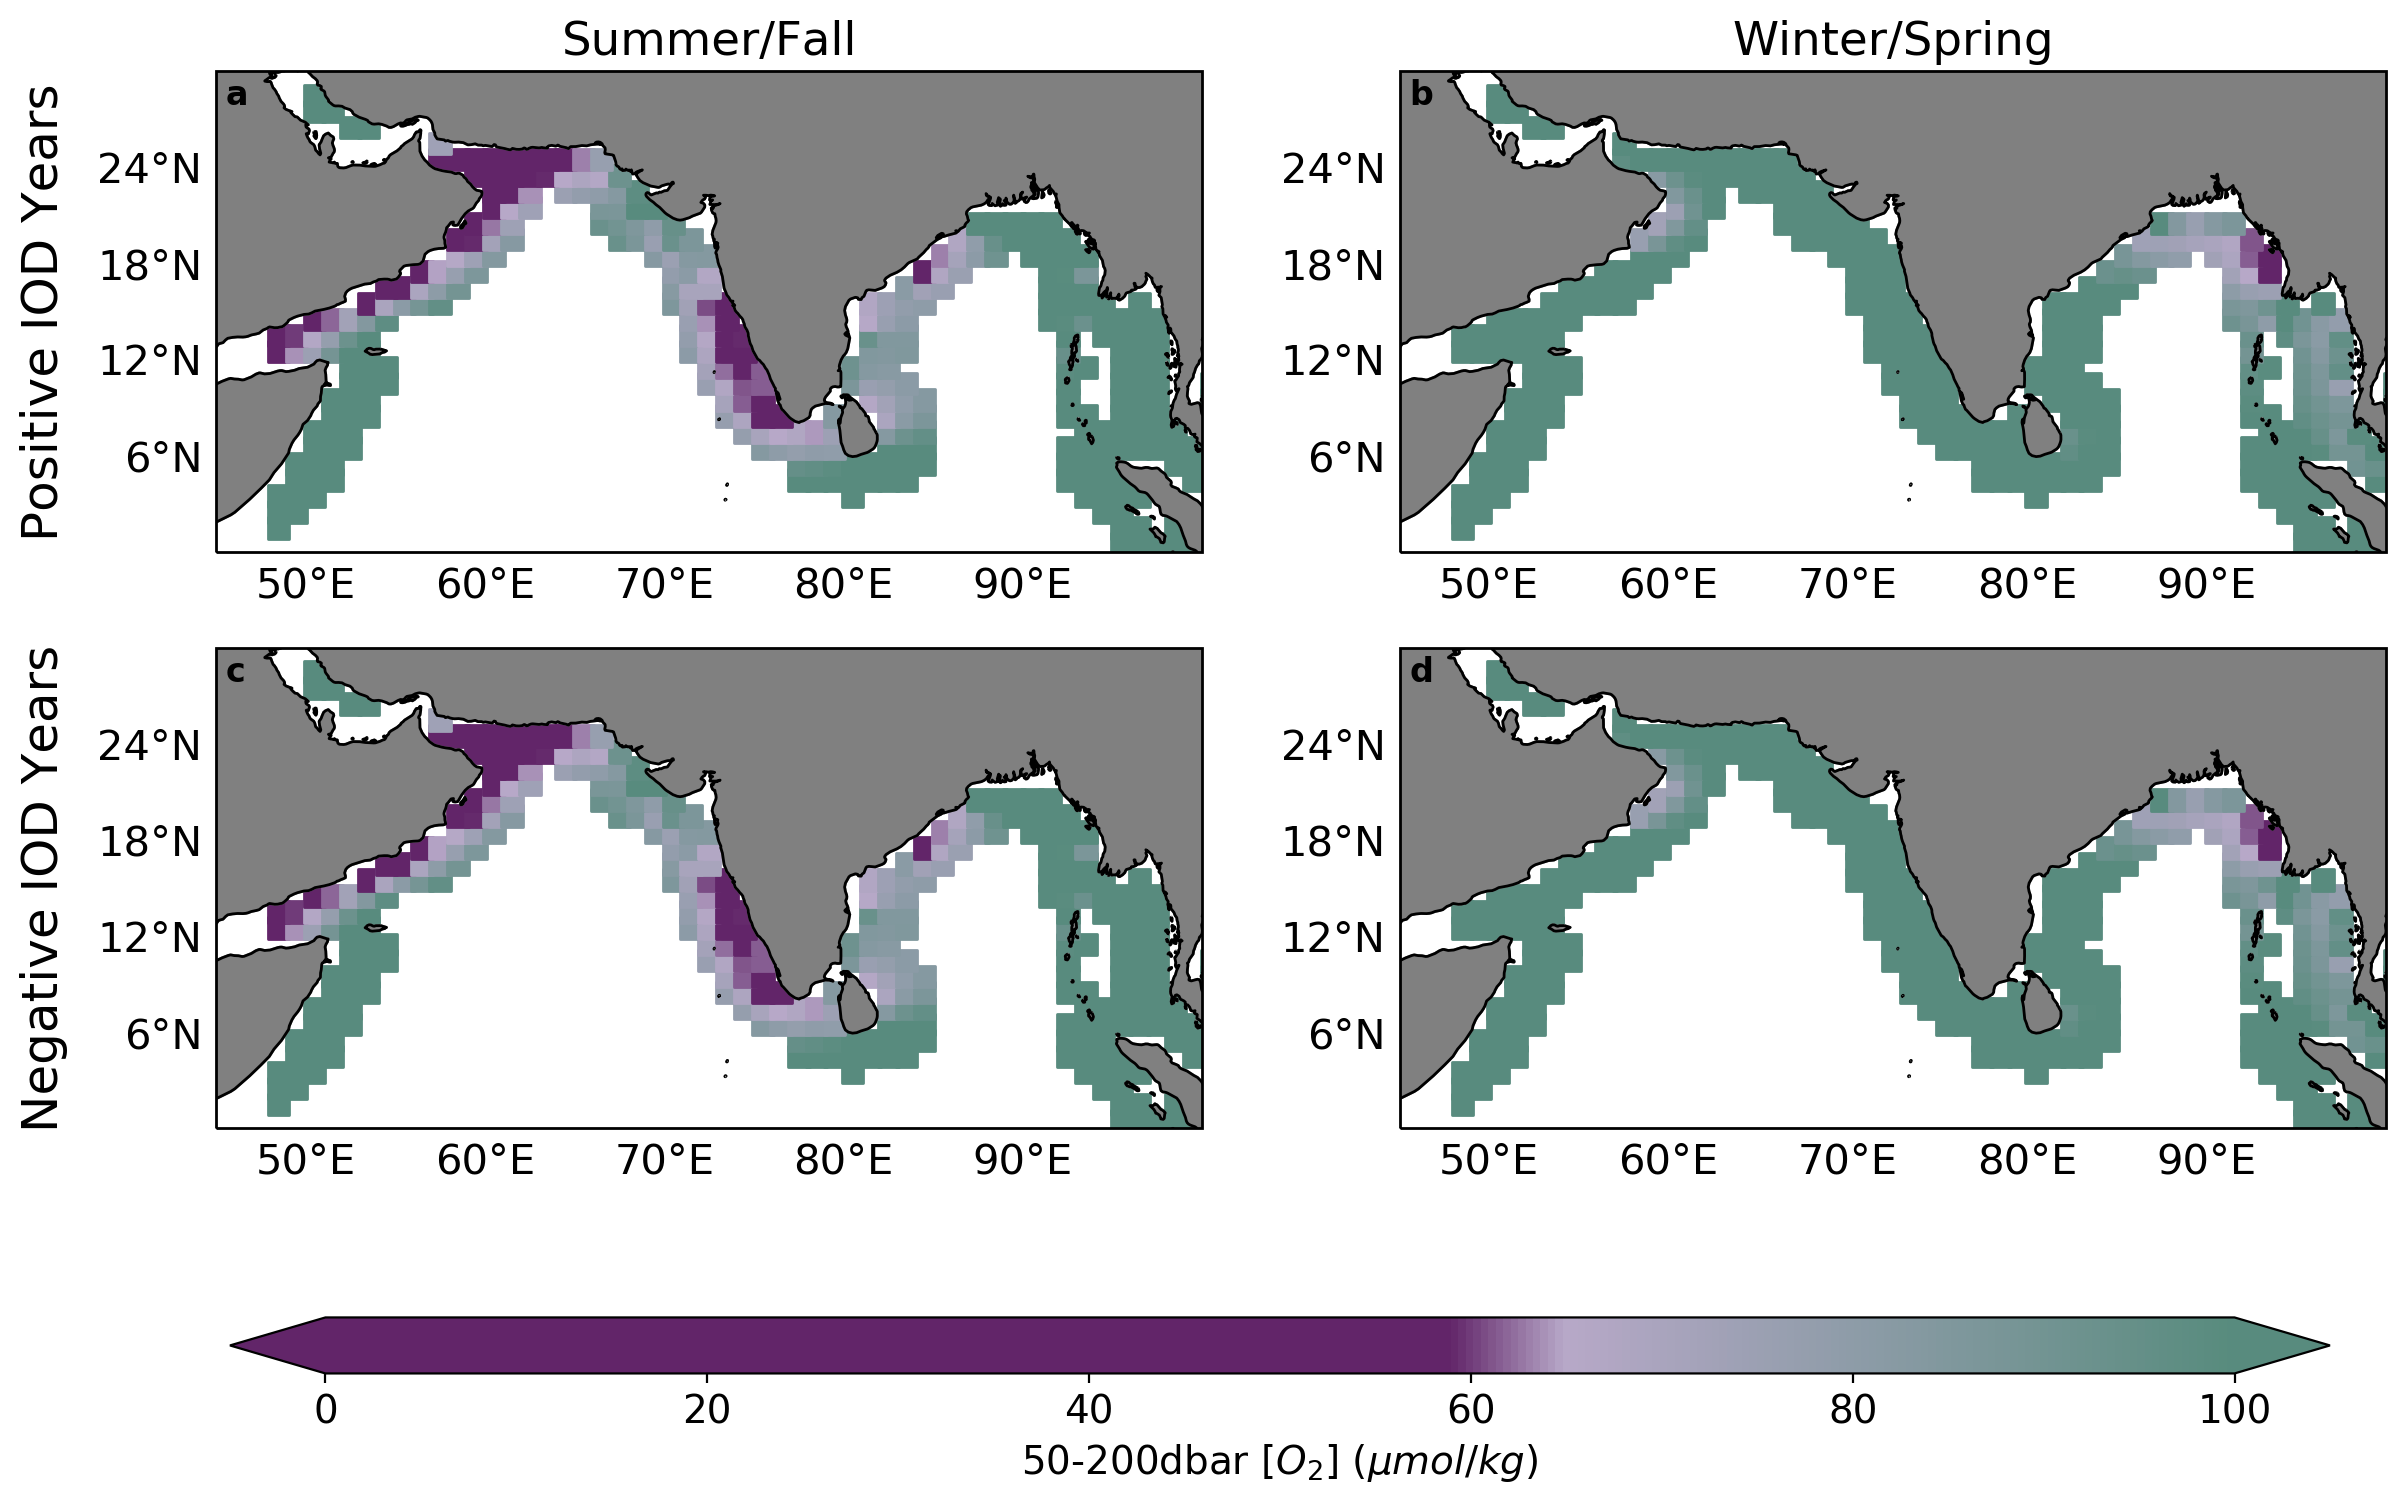

In [36]:
var = seasonal_mean
ann_mean = np.array(ann_mean)

fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(14,7),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmap = get_continuous_cmap(['#622569','#622569','#b8a9c9','#588c7e'],
                           [0,0.59,0.65, 1])
cmin = 0
cmax = 100

xx,yy = np.meshgrid(ds_WOA.lon,ds_WOA.lat)
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

plt.rcParams.update({'font.size': 14})
season_title = ['Annual Mean', 'Summer/Fall', 'Winter/Spring']

levels = np.linspace(-0.15,0.15,10)

cbounds = [45,100,0,30]


##############################################################

ax = axes[0,0]
tmp = var[0,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())

hatch_mask = np.full(min_mean.shape,1)
hatch_mask = hatch_mask.flatten()[mask]

ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,hatch = '//',
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())

ax.set_title(season_title[1])
ax.text(-0.15, 0.5, 'Positive IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 18)
add_land(ax, cbounds)
add_letter(ax, 'a', x = 0.01, y = .93)

ax = axes[0,1]

tmp = var[1,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
add_letter(ax, 'b', x = 0.01, y = .93)

ax.set_title(season_title[2])

ax = axes[1,0]
tmp = var[0,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.text(-0.15, 0.5, 'Negative IOD Years', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 18)
add_land(ax, cbounds)
add_letter(ax, 'c', x = 0.01, y = .93)

ax = axes[1,1]

tmp = var[1,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx,yy,c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
add_letter(ax, 'd', x = 0.01, y = .93)




neg = plt.Line2D((0, 1), (0, 0), color='k', linestyle='--', linewidth=2)
pos = plt.Line2D((0, 1), (0, 0), color='k', linestyle='-', linewidth=2)

# l = plt.legend([neg,pos],['upwelling', 'downwelling'],facecolor = 'w')
# plt.setp(l.get_texts(), color='w');

cbar_ax = fig.add_axes([0.13, -0.05, 0.75, 0.04])
cbar_anom = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar_anom.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')

